In [ ]:
from keras import Sequential
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Dense(5, input_dim = 2))
model.add(layers.Activation('relu'))
model.add(Dense(1))
model.add(layers.Activation('sigmoid'))

In [ ]:
model

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


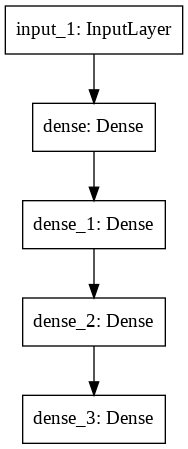

In [ ]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [ ]:
# load text
filename = '/content/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [ ]:
words = text.split()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import regex as re
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
stripped = [re_punc.sub('', w) for w in words]

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk import sent_tokenize
sentences = sent_tokenize(text)


'One morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed into a horrible vermin.'

In [ ]:
sentences[1]

'He lay on\nhis armour-like back, and if he lifted his head a little he could\nsee his brown belly, slightly domed and divided by arches into stiff\nsections.'

In [ ]:
from nltk import word_tokenize
tokens = word_tokenize(text)
words = [word for word in tokens if word.isalpha()]

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = stopwords.words("english")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog is an animal.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 10, 'quick': 9, 'brown': 2, 'fox': 4, 'jumped': 6, 'over': 8, 'lazy': 7, 'dog': 3, 'is': 5, 'an': 0, 'animal': 1}
[1.69314718 1.69314718 1.69314718 1.28768207 1.28768207 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.        ]
(1, 11)
[[0.         0.         0.36388646 0.27674503 0.27674503 0.
  0.36388646 0.36388646 0.36388646 0.36388646 0.42983441]]


In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',]
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [ ]:
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


In [ ]:
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs)

[[0.         0.         1.25276297 1.25276297 0.         0.
  0.         0.         0.        ]
 [0.         0.98082925 0.         0.         1.25276297 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.25276297
  1.25276297 0.         0.        ]
 [0.         0.98082925 0.         0.         0.         0.
  0.         1.25276297 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.25276297]]


In [ ]:
from zipfile import ZipFile
file_name = "/content/txt_sentoken.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# load one file
filename = '/content/txt_sentoken/neg/cv000_29416.txt'
# open the file as read only
file = open(filename, 'r')
# read all text
text = file.read()
# close the file
file.close()

In [ ]:
from os import listdir
# load doc into memory
def load_doc(filename):
# open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# specify directory to load
directory = 'txt_sentoken/neg'
# walk through all files in the folder
for filename in listdir(directory):
  # skip files that do not have the right extension
  if not filename.endswith(".txt"):
    next
  # create the full path of the file to open
  path = directory + '/' + filename
  # load document
  doc = load_doc(path)
  print('Loaded {}'.format(filename))

FileNotFoundError: ignored

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import string
import re
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load the document
filename = '/content/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)
# split into tokens by white space
tokens = text.split()
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
tokens = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
print(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
  # load doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # update counts
  vocab.update(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
      next
    # create the full path of the file to open
    path = directory + '/' + filename
    # add doc to vocab
    add_doc_to_vocab(path, vocab)
# save list to file
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/content/txt_sentoken/neg', vocab)
process_docs('/content/txt_sentoken/pos', vocab)
# print the size of the vocab
# print(len(vocab))

# keep tokens with > 5 occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
#save tokens to a vocabulary file
save_list(tokens, '/content/vocab.txt')

In [ ]:
len(tokens)

27139

In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load vocabulary
vocab_filename = '/content/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens
# save list to file
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
  lines = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip files that do not have the right extension
    if filename.startswith('cv9'):
        continue
  # create the full path of the file to open
  path = directory + '/' + filename
  # load and clean the doc
  line = doc_to_line(path, vocab)
  # add to list
  lines.append(line)
  return lines
# load and clean a dataset
def load_clean_dataset(vocab):
  # load documents
  neg = process_docs('/content/txt_sentoken/neg', vocab)
  pos = process_docs('/content/txt_sentoken/pos', vocab)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels
# load the vocabulary
vocab_filename = '/content/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
docs, labels = load_clean_dataset(vocab)
# summarize what we have
print(len(docs), len(labels))

2 2


In [ ]:
negative_lines

['synopsis quarterback becomes starting quarterback midway senior year high school even though hed rather read five evil football coach kilmer throws away book though evil team physician players meantime kid brother forms cult cheerleader whip cream seduce new star quarterback comments since usually review horror science fiction films feel little league discussing teen football movie pun intended thank varsity blues produced mtv really shows several extended scenes allow soundtrack mediocre pop songs meant appeal adolescent male audience crap intended teenagers reasons melodramatic angst adults problems course onedimensional characters local high school football team performs yes movie represents high school life land health teacher also parttime stripper ice cream store attendant girlfriend wears egyptian around neck kid brother forms cute cult football coach uncaring madman friends lives consist nothing getting laid driving around cop cars naked main character want however read five 

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
  lines = list()
  for filename in listdir(directory):
# skip any reviews in the test set
    if filename.startswith('cv9'):
      continue
# create the full path of the file to open
    path = directory + '/' + filename
    # load and clean the doc
    line = doc_to_line(path, vocab)
    # add to list
    lines.append(line)
  return lines
# load and clean a dataset
def load_clean_dataset(vocab):
# load documents
  neg = process_docs('/content/txt_sentoken/neg', vocab)
  pos = process_docs('/content/txt_sentoken/pos', vocab)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels
# load the vocabulary
vocab_filename = '/content/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
docs, labels = load_clean_dataset(vocab)
# summarize what we have
print(len(docs), len(labels))

1800 1800


In [ ]:
docs[:5], labels[:5]

(['whether would considered trekker probably depends would ask fan original series recently retired followup well even numbered entries film series however never one folks store away trek minutiae get debates relative merits spock vs data somewhere along line star trek film series began seem directed latter category star trek generations may natural conclusion direction production values may high writing frequently appalling instead script collection references injokes characters generations opens late century members original enterprise crew including captain james kirk william shatner present latest ship bear name sooner maiden voyage distress signal brings nexus mysterious energy among rescued nexus longlived alien dr soran malcolm mcdowell nonetoopleased back real world years later soran still trying get back nexus encounters enterprise one led captain jeanluc picard patrick stewart plan involves destroying star inhabited planet hope saving million people historic meeting two enter

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
# load doc into memory
def load_doc(filename):
# open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
# split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
# load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab, is_train):
  lines = list()
  # walk through all files in the folder
  for filename in listdir(directory):
  # skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load and clean the doc
    line = doc_to_line(path, vocab)
    # add to list
    lines.append(line)
  return lines
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
# load documents
  neg = process_docs('/content/txt_sentoken/neg', vocab, is_train)
  pos = process_docs('/content/txt_sentoken/pos', vocab, is_train)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer
# load the vocabulary
vocab_filename = '/content/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)

(1800, 26897) (200, 26897)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                1344900   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 1,344,951
Trainable params: 1,344,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
180/180 - 1s - loss: 0.4277 - accuracy: 0.8133
Epoch 2/10
180/180 - 1s - loss: 0.0356 - accuracy: 0.9922
Epoch 3/10
180/180 - 1s - loss: 0.0068 - accuracy: 1.0000
Epoch 4/10
180/180 - 1s - loss: 0.0024 - accuracy: 1.0000
Epoch 5/10
180/180 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 6/10
180/180 - 1s - loss: 6.1224e-04 - accuracy: 1.0000
Epoch 7/10
180/180 - 1s - loss: 3.8291e-04 - accuracy: 1.0000
Epoch 8/10
180/180 - 1s - loss: 2.5856e-04 - accuracy: 1.0000
Epoch 9/10
180/180 - 1s - los

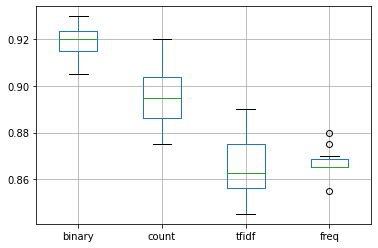

In [ ]:
# define the model
import numpy as np
from keras.layers import Dense
from keras import Sequential
from keras.utils import plot_model
from pandas import DataFrame
from matplotlib import pyplot
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize defined model
  model.summary()
  plot_model(model, to_file='model.png', show_shapes=True)
  return model
# fit network
n_words = Xtest.shape[1]
model = define_model(n_words)
# fit network
model.fit(Xtrain, np.array(ytrain), epochs=10, verbose=2, batch_size=10)
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
  scores = list()
  n_repeats = 10
  n_words = Xtest.shape[1]
  for i in range(n_repeats):
    # define network
    model = define_model(n_words)
    # fit network
    model.fit(Xtrain, ytrain, epochs=10, verbose=0)
    # evaluate
    _, acc = model.evaluate(Xtest, ytest, verbose=0)
    scores.append(acc)
    print('%d accuracy: %s' % ((i+1), acc))
  return scores
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
  # create the tokenizer
  tokenizer = Tokenizer()
  # fit the tokenizer on the documents
  tokenizer.fit_on_texts(train_docs)
  # encode training data set
  Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
  # encode training data set
  Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
  return Xtrain, Xtest
  # load the vocabulary
vocab_filename = '/content/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
  # prepare data for mode
  Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
  # evaluate model on data for mode
  results[mode] = evaluate_mode(Xtrain, np.array(ytrain), Xtest, np.array(ytest))
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()